In [ ]:
!pip install --break-system-packages kagglehub matplotlib scikit-learn numpy shap seaborn

Context



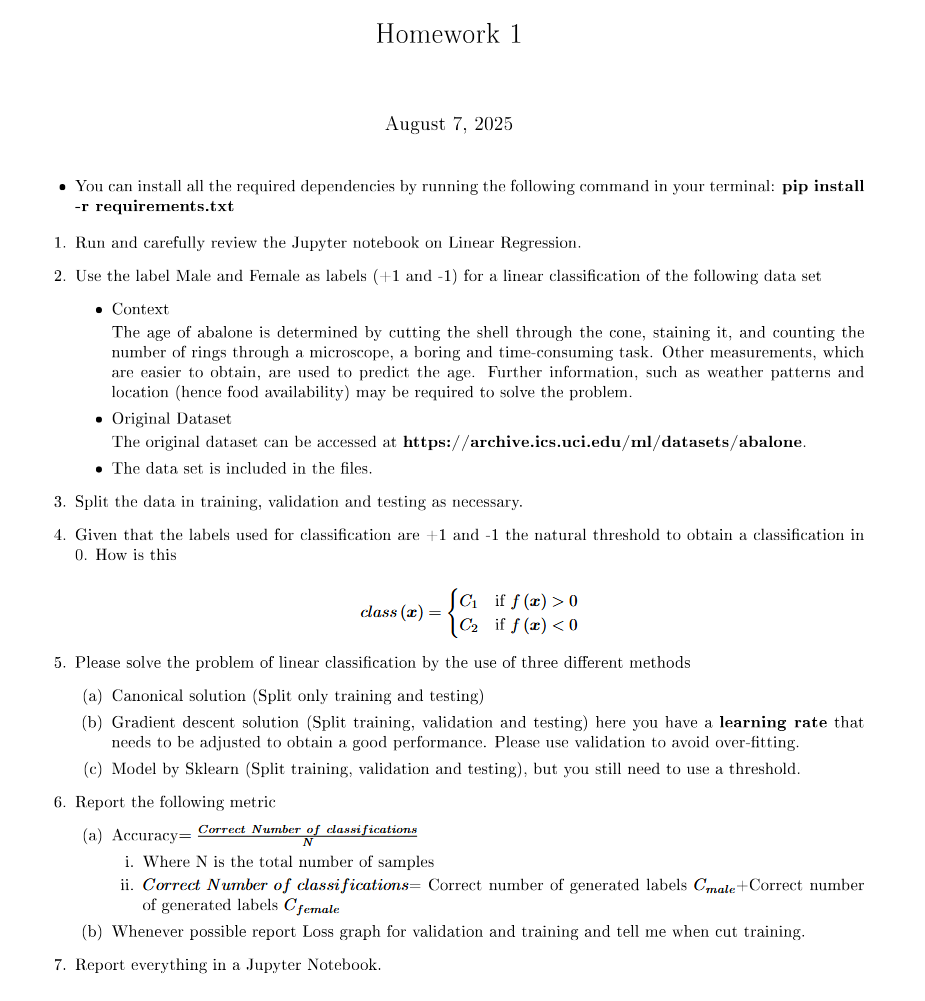

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./abalone.csv')

In [4]:
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


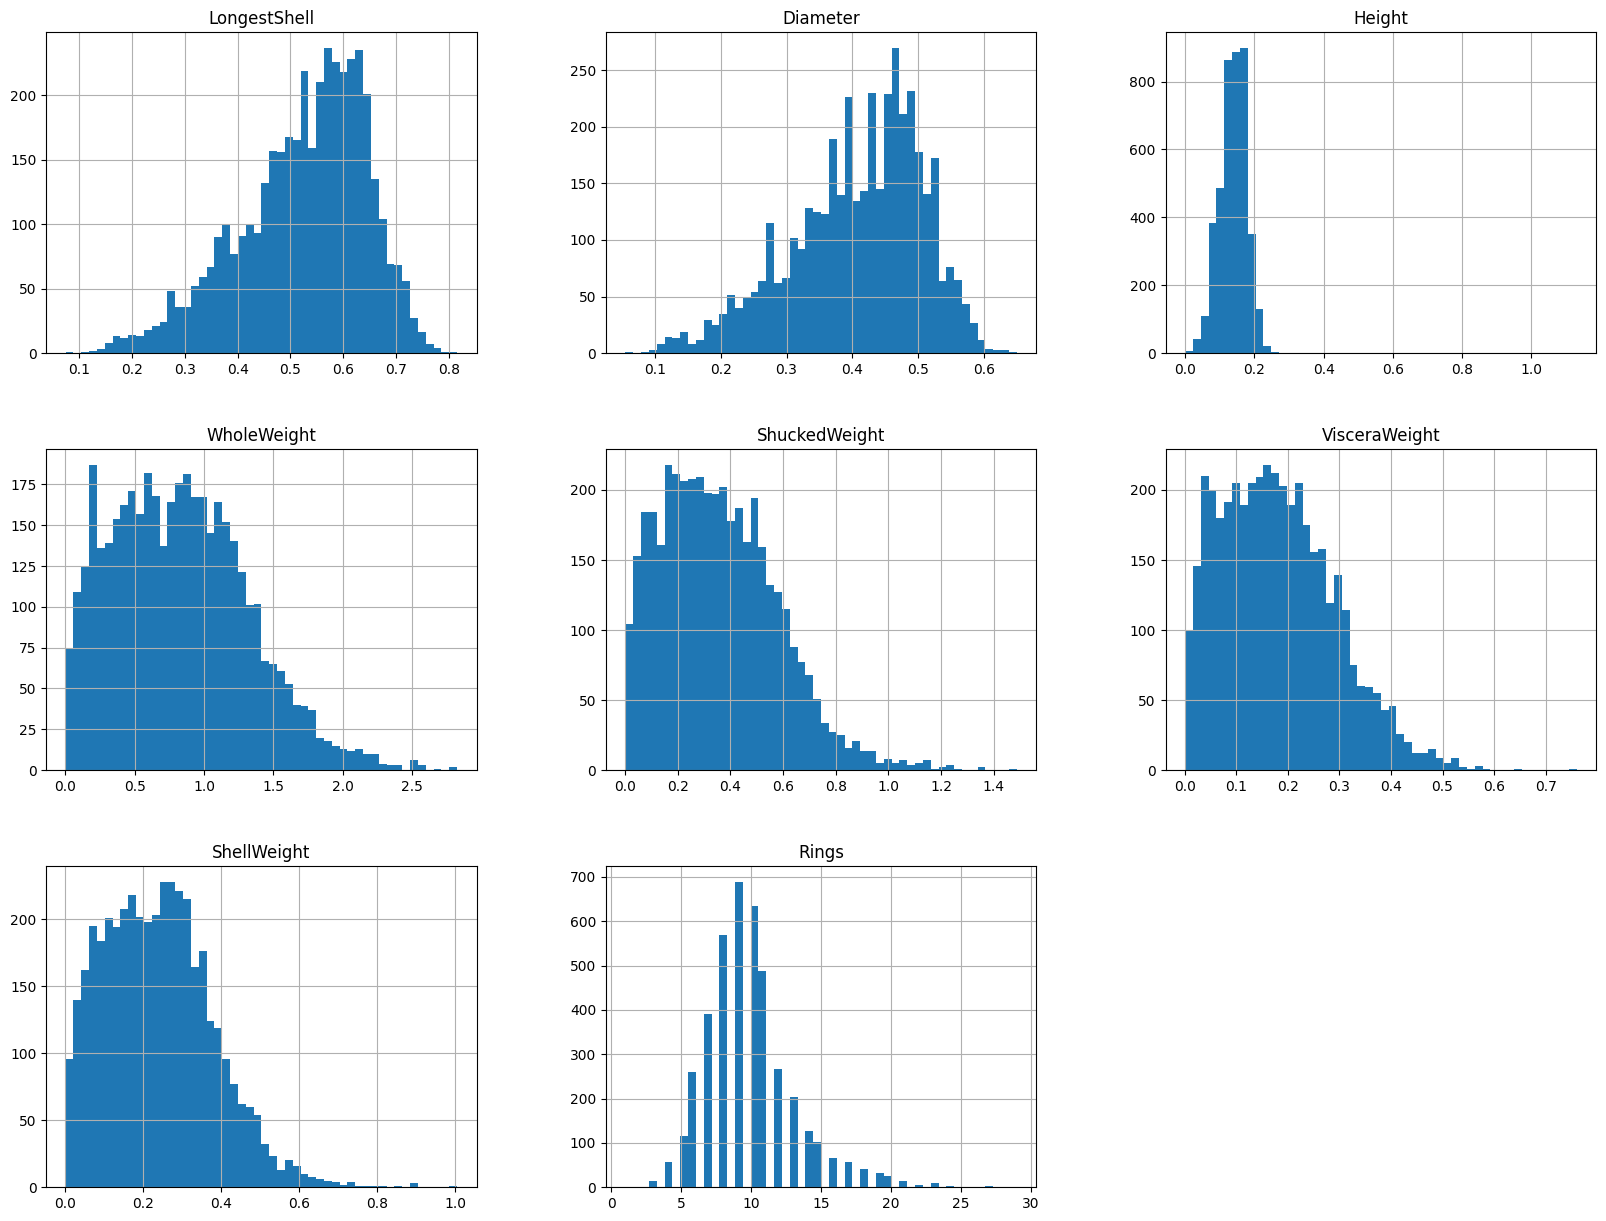

In [5]:
#we plot the numerical columns
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

Preprocessing

In [6]:
# df_encoded = pd.get_dummies(df, drop_first=True, dtype=int) #by setting dtype=int we ensure that the columns are 0 and 1 and not true and false
# df_encoded.head(20)


df_encoded = df.copy()
df_encoded["Type"] = df_encoded["Type"].map({"M": 1, "F": -1, "I": 0})
df_encoded = df_encoded[df_encoded["Type"] != 0]
df_encoded

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,-1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
#we split the data into train and test sets
from sklearn.model_selection import train_test_split
X = df_encoded.drop("Type", axis=1)
y = df_encoded["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression Canonical

In [8]:
#Version from scratch
import numpy as np

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  
theta= np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # we add the column of ones to X for the bias term
y_pred = X_test_b @ theta



Mean Absolute Percentage Error (MAPE): 96.51%
R^2 Score: 0.036113078983998625
Coefficients:
LongestShell    -1.455955
Diameter        -1.140104
Height          -1.142460
WholeWeight     -0.249423
ShuckedWeight    1.717116
VisceraWeight   -0.830717
ShellWeight      0.255459
Rings            0.005456
dtype: float64


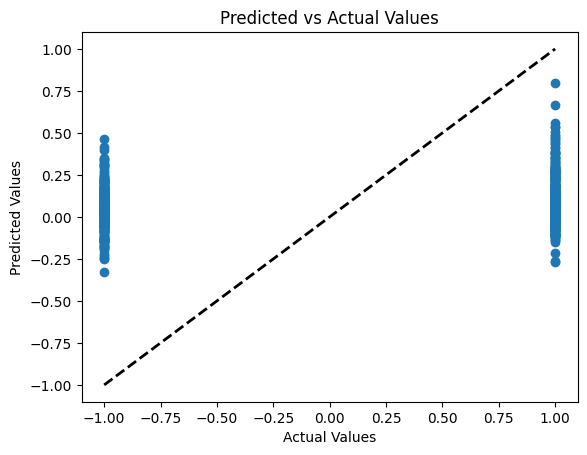

In [9]:

#we can now calculate the mape 
from sklearn.metrics import mean_absolute_percentage_error
mape_from_scratch= mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape_from_scratch * 100:.2f}%")

#we can also calculate the R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

#we can also calculate the coefficients
coefficients = pd.Series(theta[1:], index=X_train.columns)
print("Coefficients:")
print(coefficients)

# new_y = y_pred.copy()
# new_y = np.where(new_y > 0, 1, np.where(new_y < 0, -1, 0))
# print(new_y)

#we can also plot the predictions vs the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) #to plot the line equation 
# plt.show()
# This dashed line represents the ideal case where the predicted values perfectly match the actual values (y = x).
# It serves as a visual reference to evaluate how close the model's predictions (y_pred) are to the true targets (y_test).
# We are not using the model's coefficients here—this is simply a diagonal line from the minimum to the maximum of y_test.